In [102]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

$$T = \begin{bmatrix}
1 & 0 & 0 & -p_{0x} \\
0 & 1 & 0 & -p_{0y} \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix} \\[5pt]

R = \begin{bmatrix}
    cos(\theta) & -sin(\theta) & 0 & 0 \\
    sin(\theta) & cos(\theta) & 0 & 0 \\
    0 & 0 & 1 & 0 \\
    0 & 0 & 0 & 1
\end{bmatrix} \\[5pt]

R_f = R \cdot T
$$

Πρώτα γίνεται το translation και μετά το rotation

<img src="DistanceFromLineSegment.jpg" width=500 height=400 />

In [119]:
def dbm_deconv(x):
    return 1e-3 * np.exp(x/20.0)

In [118]:
class Robot:
    def __init__(self,pos,antennas:list):
        self.antennas = antennas
        self.position = pos
        self.num_of_antennas = len(antennas)
    def update_pos(self,pos):
        self.position = pos

In [111]:
class Tag:
    def __init__(self,pos):
        self.position = pos

In [120]:
class Antenna:
    def __init__(self,z:float,G:float):
        self.z = z
        self.Gdmb = G
        self.G = dbm_deconv(G)

In [107]:
def pdistance(p,pstart,pend):
    A = p[0]-pstart[0]
    B = p[1]-pstart[1]
    C = pend[0]-pstart[0]
    D = pend[1]-pstart[1]

    dot = A*C+B*D
    len_sq = C*C+D*D
    param = -1
    if(len_sq !=0):
        param = dot/len_sq
    
    xx,yy = None,None

    if(param<0):
        xx = pstart[0]
        yy = pstart[1] 
    elif(param>1):
        xx = pend[0]
        yy = pend[1]
    else:
        xx = pstart[0] + param*C
        yy = pstart[1] + param*D

    dx = p[0] - xx
    dy = p[1] - yy
    return np.sqrt(dx*dx+dy*dy)

0.3461806674364896
Gt=0.00036787944117144236
Gr=0.0004723665527410147
r=8.69773591885559
Pr=1.7432437448514567e-12
r=8.6239230327396
Pr=1.7732125923719815e-12
r=8.550642480836299
Pr=1.8037363362679929e-12
r=8.477908067179557
Pr=1.834818645263199e-12
r=8.405733968905627
Pr=1.8664624987548593e-12
r=8.334134743119998
Pr=1.8986701167748844e-12
r=8.263125333488881
Pr=1.931442885726096e-12
r=8.192721076505135
Pr=1.964781279821331e-12
r=8.122937707373937
Pr=1.9986847781790943e-12
r=8.05379136545907
Pr=2.0331517775601986e-12
r=7.985298599226517
Pr=2.0681795007656254e-12
r=7.917476370616767
Pr=2.1037639007578862e-12
r=7.850342058773018
Pr=2.13989956061582e-12
r=7.783913463047137
Pr=2.176579589487579e-12
r=7.71820880520035
Pr=2.213795514768249e-12
r=7.653246730710967
Pr=2.2515371707974995e-12
r=7.589046309096023
Pr=2.2897925844498324e-12
r=7.525627033149445
Pr=2.328547858074537e-12
r=7.463008816994363
Pr=2.3677870503355428e-12
r=7.401211992842885
Pr=2.4074920556022288e-12
r=7.340257306352906
Pr=

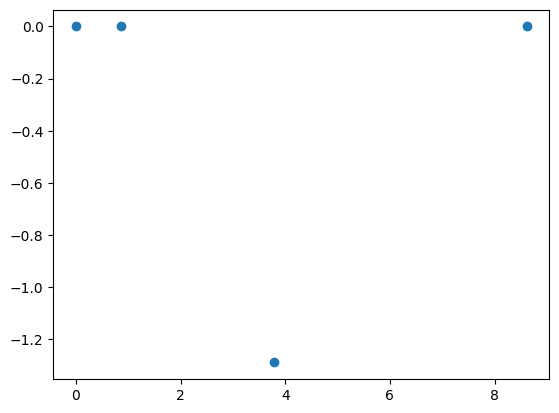

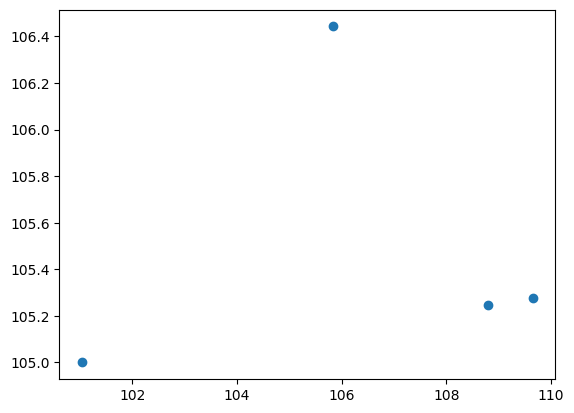

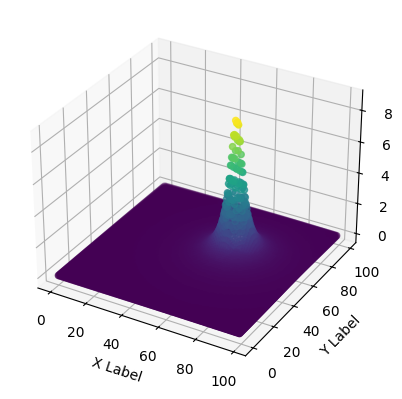

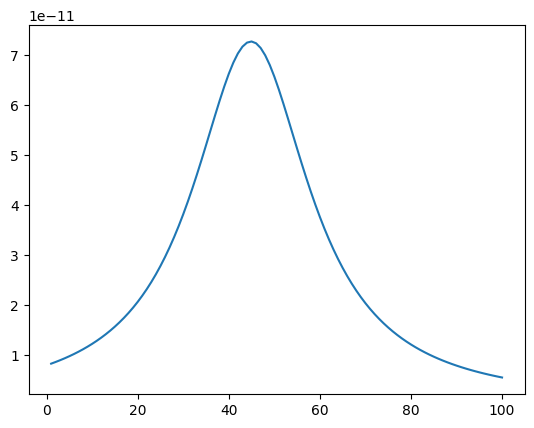

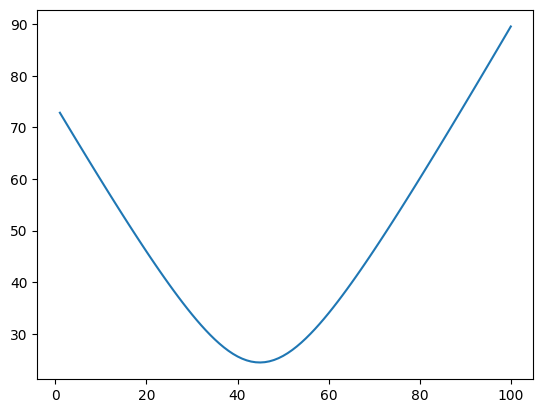

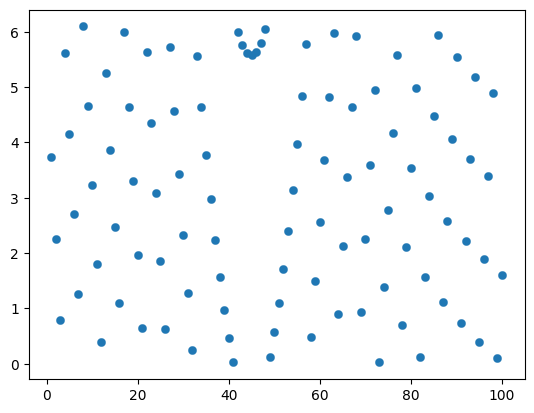

The distance is 1.2890261954797786


In [ ]:
#Get random point for the straight movement and the tag location
Antenna1 = Antenna(0.2,-15)
Antenna2 = Antenna(0.4,-15)
p1 = np.array([100+10*np.random.rand(),100+10*np.random.rand(),0]) #QUESTION: What should I do with z?
p2 = np.array([100+10*np.random.rand(),100+10*np.random.rand(),0])
Robot_inst = Robot(p1,[Antenna1,Antenna2])
kappa = 0.1
p3 = (1-kappa)*p1+kappa*p2
tagp = np.array([100+10*np.random.rand(),100+10*np.random.rand(),np.random.rand()])

#Take a new tag location until the distance of the tag from the line segment is greater than 0.1
#QUESTION: Is the pdistance function ok?
#QUESTION: Should we treat minR different than maxR?
while(pdistance(tagp,p1,p2)<0.1 or pdistance(tagp,p1,p2) > 2):
    tagp = np.array([100+10*np.random.rand(),100+10*np.random.rand(),np.random.rand()])

tag1 = Tag(tagp)

#Find the line segment theta angle
theta = np.atan2(p2[1]-p1[1],p2[0]-p1[0])
p1_hat = np.hstack((p1,1)).reshape(-1,1)
p2_hat = np.hstack((p2,1)).reshape(-1,1)
p3_hat = np.hstack((p3,1)).reshape(-1,1)


#We assume the RFID tag frequency is 866MHz
#QUESTION: Is this fair?
freq = 866e6
#QUESTION: Should c be 3e8? What is the bibliography like?
c = 299792458.0
lambda_signal = c/freq
print(lambda_signal)

tagp_hat = np.hstack((tagp,1)).reshape(-1,1)
Gt = dbm_deconv(-20)
Gr = dbm_deconv(-15)
print(f"Gt={Gt}")
print(f"Gr={Gr}")
Pt = 1
#maybe make this into a function
list_arr = np.zeros([100,100])
for i in range(0,100):
    for j in range(0,100):
        #we put z = 0 (is this correct?)
        new_point = np.array([100+0.1*i,100+0.1*j,0])
        r = np.linalg.norm(tagp-new_point)
        #we calculate the Friis equation
        Pr = Gt*Gr*pow(lambda_signal,2)/pow(4*np.pi*r,2)
        list_arr[i,j] = Pr
        #Check if Pr is greater than the threshold
        if(Pr > Pt):
            print(f"Passed {i,j}")
        print(f"r={r}")
        print(f"Pr={Pr}")

max_linepoints = 100

for antenna in Robot_inst.antennas:
    phases = np.zeros(max_linepoints)
    orbit_power = np.zeros(max_linepoints)
    for i in range(0,max_linepoints):
        kappa = i/float(max_linepoints)
        #there will be a problem with z if p1 and p2 do not have z = 0
        Robot_inst.update_pos((1-kappa)*p1+kappa*p2)
        r = np.linalg.norm(tag1.position-Robot_inst.position)
        #we calculate the Friis equation
        Pr = Gt*antenna.G*pow(lambda_signal,2)/pow(4*np.pi*r,2)
        orbit_power[i] = Pr
        phases[i] = ((2*np.pi)/lambda_signal * r)
    

#Calculate transformation matrix and do the transformations
T = np.matrix([[1,0,0,-p1[0]],[0,1,0,-p1[1]],[0,0,1,0],[0,0,0,1]])
R = np.matrix([[np.cos(theta),np.sin(theta),0,0],[-np.sin(theta),np.cos(theta),0,0],[0,0,1,0],[0,0,0,1]])
R_f = R*T
new_p1 = R_f*p1_hat
new_p1[new_p1<1e-15] = 0
new_p2 = R_f*p2_hat
new_p2[new_p2<1e-15] = 0
new_p3 = R_f*p3_hat
new_p3[new_p3<1e-15] = 0
new_tagp = R_f*tagp_hat


#plot results
fig = plt.figure()
plt.scatter(np.array([new_p1[0],new_p2[0],new_p3[0],new_tagp[0]]),np.array([new_p1[1],new_p2[1],new_p3[1],new_tagp[1]]))
fig2 = plt.figure()
plt.scatter(np.array([p1[0],p2[0],p3[0],tagp[0]]),np.array([p1[1],p2[1],p3[1],tagp[1]]))


# Create X and Y coordinate grids
x = np.arange(0, 100)  # X values from 1 to 100
y = np.arange(0, 100)  # Y values from 1 to 100
X, Y = np.meshgrid(x, y)  # Create coordinate grid

# Flatten arrays for scatter plot
X_flat = X.flatten()
Y_flat = Y.flatten()
Z_flat = list_arr.flatten()  # Z values from the matrix

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(X_flat, Y_flat, Z_flat, c=Z_flat)

# Labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

fig = plt.figure()
x = np.arange(1,max_linepoints+1)
plt.plot(x,orbit_power)
plt.show()

fig = plt.figure()
x = np.arange(1,max_linepoints+1)
plt.plot(x,phases)
plt.show()

fig = plt.figure()
x = np.arange(1,max_linepoints+1)
plt.scatter(x,phases%(2*np.pi),linewidths=0.2)
plt.show()

print(f"The distance is {pdistance(tagp,p1,p2)}")
